**MLP (Multi-Layer Perceptron)**

In [ ]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

USE_CUDA = torch.cuda.is_available() # GPU를 사용가능하면 True, 아니라면 False를 리턴
device = torch.device("cuda" if USE_CUDA else "cpu") # GPU 사용 가능하면 사용하고 아니면 CPU 사용
print("다음 기기로 학습합니다:", device)

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

다음 기기로 학습합니다: cuda


**Model code**

In [ ]:
class MLP(torch.nn.Module):
    def __init__(self):

        super(MLP, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(784, 100),
            nn.ReLU(),
            nn.Linear(100, 100),
            nn.ReLU(),
            nn.Linear(100, 10),
       )

    def forward(self, x):

        return self.model(x)

**Training**

In [ ]:
# hyperparameters

training_epochs = 3
batch_size = 100

# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

# dataset loader
data_loader = DataLoader(dataset=mnist_train,
                        batch_size=batch_size,
                        shuffle=True)

# MLP 객체 생성

model = MLP().to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for idx, (x_train, y_train) in enumerate(data_loader):
        x_train = x_train.view(-1, 28 * 28).to(device)
        y_train = y_train.to(device)

        outputs = model(x_train)
        cost = criterion(outputs, y_train)

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:00<00:00, 17761439.54it/s]


Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 475274.91it/s]


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:00<00:00, 3796817.34it/s]


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 11774121.61it/s]


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw

Epoch: 0001 cost = 0.246218905
Epoch: 0002 cost = 0.133334905
Epoch: 0003 cost = 0.112655535
Learning finished


**Testing**

In [ ]:
# 테스트 데이터를 사용하여 모델을 테스트한다.
with torch.no_grad(): # torch.no_grad()를 하면 gradient 계산을 수행하지 않는다.
    x_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    y_test = mnist_test.test_labels.to(device)

    prediction = model(x_test)
    correct_prediction = torch.argmax(prediction, 1) == y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())


Accuracy: 0.9652999639511108


/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:81: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:71: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Label:  8
Prediction:  5


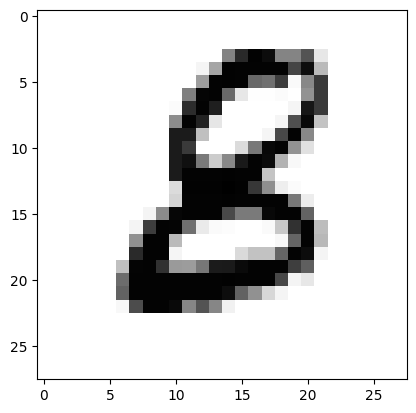

In [ ]:
with torch.no_grad():
    # MNIST 테스트 데이터에서 틀린 샘플 중 무작위로 하나를 뽑아서 예측을 해본다
    wrong_indices = (correct_prediction == 0).nonzero(as_tuple=True)[0]  #틀린 샘플들 인덱스 추출
    r = random.randint(0, len(wrong_indices) - 1)
    r = wrong_indices[r].cpu().item()
    x_single_data = mnist_test.data[r:r + 1].view(-1, 28 * 28).float().cuda()
    y_single_data = mnist_test.targets[r:r + 1].cuda()

    print('Label: ', y_single_data.item())
    single_prediction = model(x_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()